In [1]:
import geopandas
import numpy
import matplotlib.pyplot as plt
import geoplanar
import libpysal
from shapely.geometry import Polygon


## Planar Enforcement Violation: non-planar enforced edges

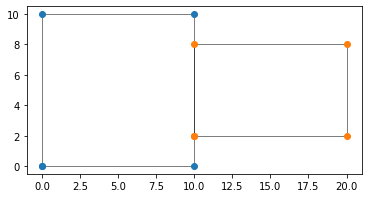

In [2]:
c1 = [[0,0], [0, 10], [10, 10], [10, 0], [0, 0]]
p1 = Polygon(c1)
c2 = [[10, 2], [10, 8], [20, 8], [20, 2], [10, 2]]
p2 = Polygon(c2)
gdf = geopandas.GeoDataFrame(geometry=[p1, p2])
base = gdf.plot(edgecolor='k', facecolor="none",alpha=0.5)
c1 = numpy.array(c1)
c2 = numpy.array(c2)
_ = base.scatter(c1[:,0], c1[:,1])
_ =base.scatter(c2[:,0], c2[:,1])



The two polygons are visually contiguous, but are not planar enforced as the right edge of the left polygon  and the left edge of right polygon  share no vertices. This will result in the two polygons not being Queen neighbors, since a necessary (and sufficient) condition for the latter is at least one shared vertex.

In [3]:
w = libpysal.weights.Queen.from_dataframe(gdf)

/home/serge/anaconda3/envs/dev38/lib/python3.8/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
 There are 2 islands with ids: 0, 1.
  warnings.warn(message)


## Detecting nonplanar edges

`geoplanar` can detect and report nonplanar edges:

In [4]:
geoplanar.non_planar_edges(gdf)

defaultdict(set, {0: {1}})

## Fixing nonplanar edges

In [5]:
geoplanar.is_planar_enforced(gdf)

False

In [6]:
gdf1 = geoplanar.fix_npe_edges(gdf)

In [7]:
geoplanar.non_planar_edges(gdf1)

defaultdict(set, {})

In [8]:
w1 = libpysal.weights.Queen.from_dataframe(gdf1)
w1.neighbors

{0: [1], 1: [0]}

In [9]:
geoplanar.is_planar_enforced(gdf1)

True

## Planar Enforcement Violation: Overlapping and non-planar enforced edges

In [10]:
from shapely.geometry import Polygon

In [11]:

t1 = Polygon([[0,0],[10,10], [20,0]])

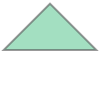

In [12]:
t1

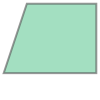

In [13]:
b1 = Polygon([[5,5], [20,5], [20,-10], [0,-10]])
b1

In [14]:
gdf = geopandas.GeoDataFrame(geometry=[t1,b1])

<AxesSubplot:>

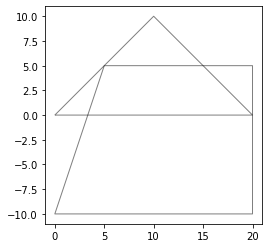

In [15]:
gdf.plot(edgecolor='k',facecolor="none",alpha=0.5) # non planar enforcement


The two features overlap and would appear to share vertices, but they in fact do not share vertices. Again, because this violates planar enforcement, this results in two polygons not being Queen neighbors:

In [16]:
import libpysal

w = libpysal.weights.Queen.from_dataframe(gdf)

/home/serge/anaconda3/envs/dev38/lib/python3.8/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
 There are 2 islands with ids: 0, 1.
  warnings.warn(message)


## Detecting nonplanar edges

`geoplanar` will use a failed contiguity check as part of a check for nonplanar enforced edges in the polygons of a geoseries:

In [17]:
geoplanar.non_planar_edges(gdf)

defaultdict(set, {0: {1}})

## Correcting nonplanar edges

In [18]:
gdf_fixed = geoplanar.fix_npe_edges(gdf)
geoplanar.non_planar_edges(gdf_fixed)

defaultdict(set, {})

## Default is to work on a copy

In [19]:
geoplanar.non_planar_edges(gdf)

defaultdict(set, {0: {1}})

In [20]:
geoplanar.fix_npe_edges(gdf, inplace=True) 


,geometry
0,"POLYGON ((0.00000 0.00000, 5.00000 5.00000, 10..."
1,"POLYGON ((5.00000 5.00000, 15.00000 5.00000, 2..."


In [21]:
geoplanar.non_planar_edges(gdf)

defaultdict(set, {})

In [22]:
w = libpysal.weights.Queen.from_dataframe(gdf)
w.neighbors

{0: [1], 1: [0]}